In [112]:
# Import packages needed for Part 1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Define the target distribution f(x) = 1/2 * exp(-|x|)
def f(x):
    return 0.5 * np.exp(-np.abs(x))

In [114]:
# Create a Random Walk Metropolis Algorithm
def metropolis_algorithm(N, s, x0):
    samples = np.zeros(N)
    samples[0] = x0
    for i in range(1, N):
        x_star = np.random.normal(samples[i-1], s)
        r = f(x_star) / f(samples[i-1])
        u = np.random.rand()
        if u < r:
            samples[i] = x_star
        else:
            samples[i] = samples[i-1]
    return samples

Part 1(a)

In [116]:
# Parameters
N = 10000  # Number of samples
x0 = 0     # Initial value
s = 1      # Standard deviation for proposal distribution

In [117]:
# Generate samples using the Random Walk Metropolis Algorithm
samples = metropolis_algorithm(N, s, x0)

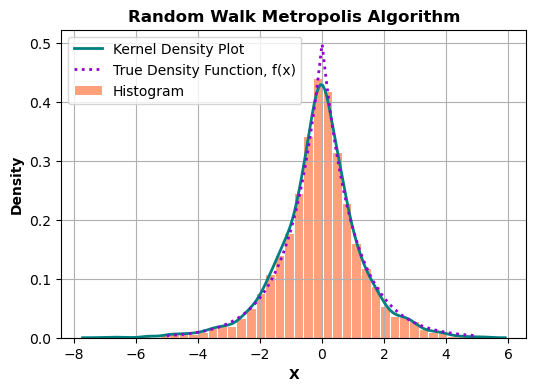

Sample Mean: -0.07881479066943044
Sample Standard Deviation: 1.3291219578604818


In [156]:
# Define the x_values for plotting
x_values = np.linspace(-5, 5, 1000)

plt.figure(figsize=(6, 4))

# Plot histogram and kernel density plot
sns.histplot(samples, bins=40, edgecolor='white', color='coral', label='Histogram', stat='density')
sns.kdeplot(samples, color='teal', label='Kernel Density Plot', linewidth=2)
plt.plot(x_values, f(x_values), color='darkviolet', label='True Density Function, f(x)', linewidth=2, linestyle=':')
plt.title('Random Walk Metropolis Algorithm', fontweight='bold')
plt.xlabel('X', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Calculating the sample mean and standard deviation of all x values
sample_mean = np.mean(samples)
sample_std = np.std(samples)
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)

Part 1(b) 

In [120]:
# Function to compute the R hat value
def compute_r_hat(chains):
    num_chains = len(chains)
    means = np.zeros(num_chains)
    variances = np.zeros(num_chains)

    for i, chain_samples in enumerate(chains):
        means[i] = np.mean(chain_samples)
        variances[i] = np.var(chain_samples)

    overall_mean = np.mean(means)
    within_chain_variance = np.mean(variances)
    between_chain_variance = np.sum((means - overall_mean) ** 2) / num_chains
    
    r_value = np.sqrt((within_chain_variance + between_chain_variance) / within_chain_variance)
    
    return r_value

In [121]:
# Parameters
J = 4  
N = 2000  
s_values = np.linspace(0.001, 1, 100)  # Range of s values from 0.001 to 1

In [122]:
# Compute R hat values
r_hat_values = []
for s in s_values:
    chains = [metropolis_algorithm(N, s, np.random.normal(0, 1)) for _ in range(J)]  
    r_hat = compute_r_hat(chains)  
    r_hat_values.append(r_hat)

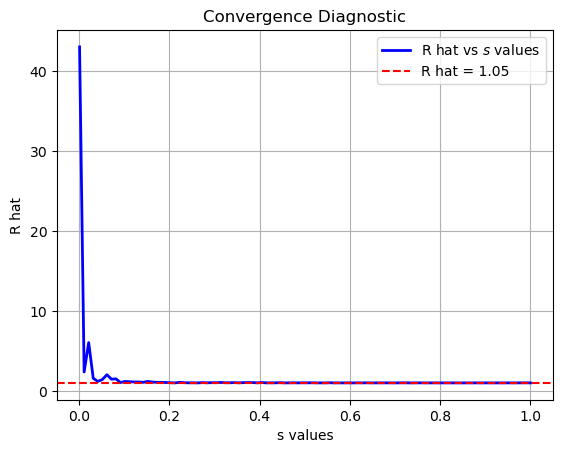

In [123]:
# Step: Plot R hat values over a range of s values
plt.plot(s_values, r_hat_values, label= "R hat vs $s$ values", color='blue', linewidth=2)
plt.axhline(y=1.05, color='red', linestyle='--', label= "R hat = 1.05")
plt.title("Convergence Diagnostic")
plt.xlabel("s values")
plt.ylabel("R hat")
plt.legend()
plt.grid(True)
plt.show()